<a href="https://colab.research.google.com/github/RuthBiney/Wine_Quality_Analysis/blob/main/Wine_Quality_Analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/wine+quality.zip', 'r') as zip_ref:
    # Extract the red and white wine files
    zip_ref.extract('winequality-red.csv', '/content/')
    zip_ref.extract('winequality-white.csv', '/content/')

# Load the datasets, specifying the correct file names
red_wine = pd.read_csv('/content/winequality-red.csv', sep=';')
white_wine = pd.read_csv('/content/winequality-white.csv', sep=';')

# ... (rest of your code remains the same)
# Add a column to differentiate between red and white wine
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine the datasets
combined_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Separating features and target variable
X = combined_wine.drop(['quality', 'wine_type'], axis=1)
y = combined_wine['quality']
wine_type = combined_wine['wine_type']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test, wine_type_train, wine_type_test = train_test_split(
    X_scaled, y, wine_type, test_size=0.2, random_state=42
)

# Split the training data by wine type
X_red_train = X_train[wine_type_train == 'red']
y_red_train = y_train[wine_type_train == 'red']
X_white_train = X_train[wine_type_train == 'white']
y_white_train = y_train[wine_type_train == 'white']

# Split the test data by wine type
X_red_test = X_test[wine_type_test == 'red']
y_red_test = y_test[wine_type_test == 'red']
X_white_test = X_test[wine_type_test == 'white']
y_white_test = y_test[wine_type_test == 'white']

# Building the models
model_red = RandomForestClassifier(random_state=42)
model_white = RandomForestClassifier(random_state=42)

# Training the models
model_red.fit(X_red_train, y_red_train)
model_white.fit(X_white_train, y_white_train)

# Save the models
joblib.dump(model_red, 'model_red.pkl')
joblib.dump(model_white, 'model_white.pkl')

print("Models have been saved as 'model_red.pkl' and 'model_white.pkl'")


Models have been saved as 'model_red.pkl' and 'model_white.pkl'


In [4]:
# Load the models
loaded_model_red = joblib.load('model_red.pkl')
loaded_model_white = joblib.load('model_white.pkl')

# Verify the models
red_test_pred = loaded_model_red.predict(X_red_test)
white_test_pred = loaded_model_white.predict(X_white_test)

print("Red wine model test accuracy:", (red_test_pred == y_red_test).mean())
print("White wine model test accuracy:", (white_test_pred == y_white_test).mean())


Red wine model test accuracy: 0.718475073313783
White wine model test accuracy: 0.6684045881126173


# Wine Quality Prediction

This notebook demonstrates the entire machine learning pipeline for predicting wine quality, from data preprocessing to model evaluation and saving the model. We'll create and evaluate an MLP model, and prepare it for deployment.


## Step 1: Data Overview and Cleaning

First, we load the dataset and perform a quick overview to understand its structure and check for missing values.


In [6]:
# Step 1: Data Overview and Cleaning
import pandas as pd
import zipfile

# Unzipping the dataset
with zipfile.ZipFile('/content/wine+quality.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Loading the datasets
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Data Overview
print("Red Wine Data Overview:")
print(red_wine.info())
print(red_wine.describe())

print("\nWhite Wine Data Overview:")
print(white_wine.info())
print(white_wine.describe())

# Check for missing values
print("\nMissing values in Red Wine data:\n", red_wine.isnull().sum())
print("\nMissing values in White Wine data:\n", white_wine.isnull().sum())


Red Wine Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000      

## Step 2: Exploratory Data Analysis (EDA)

We'll create visualizations to understand the data better, including correlation heatmaps and the distribution of quality ratings.


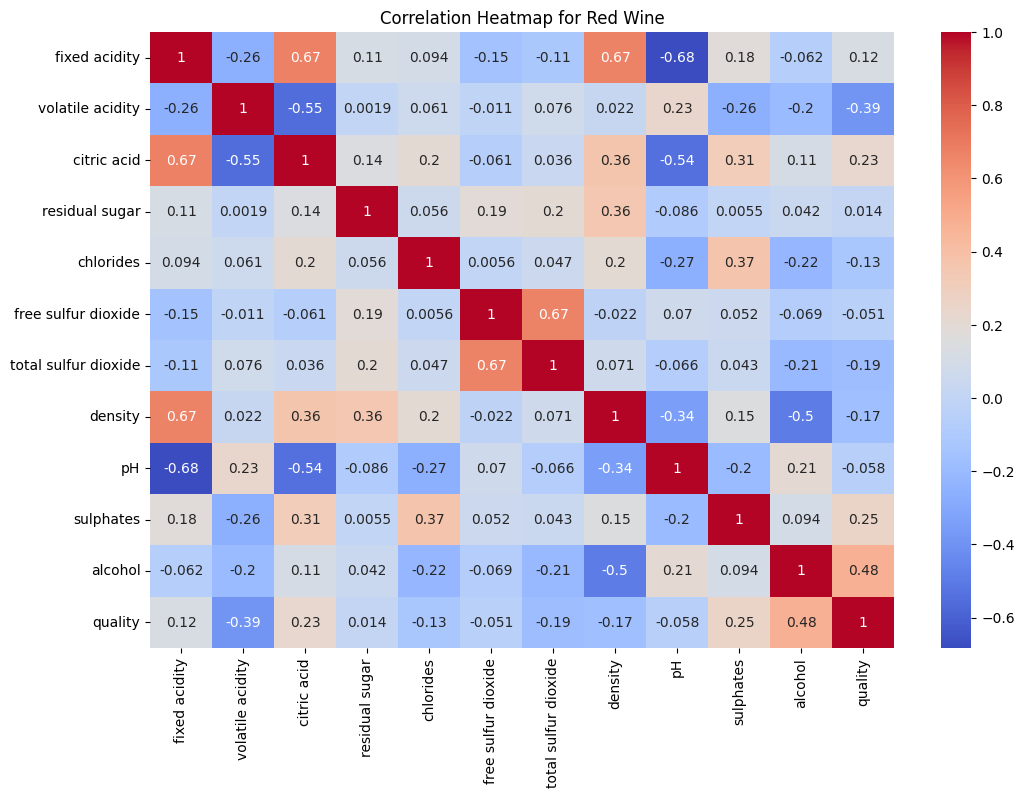

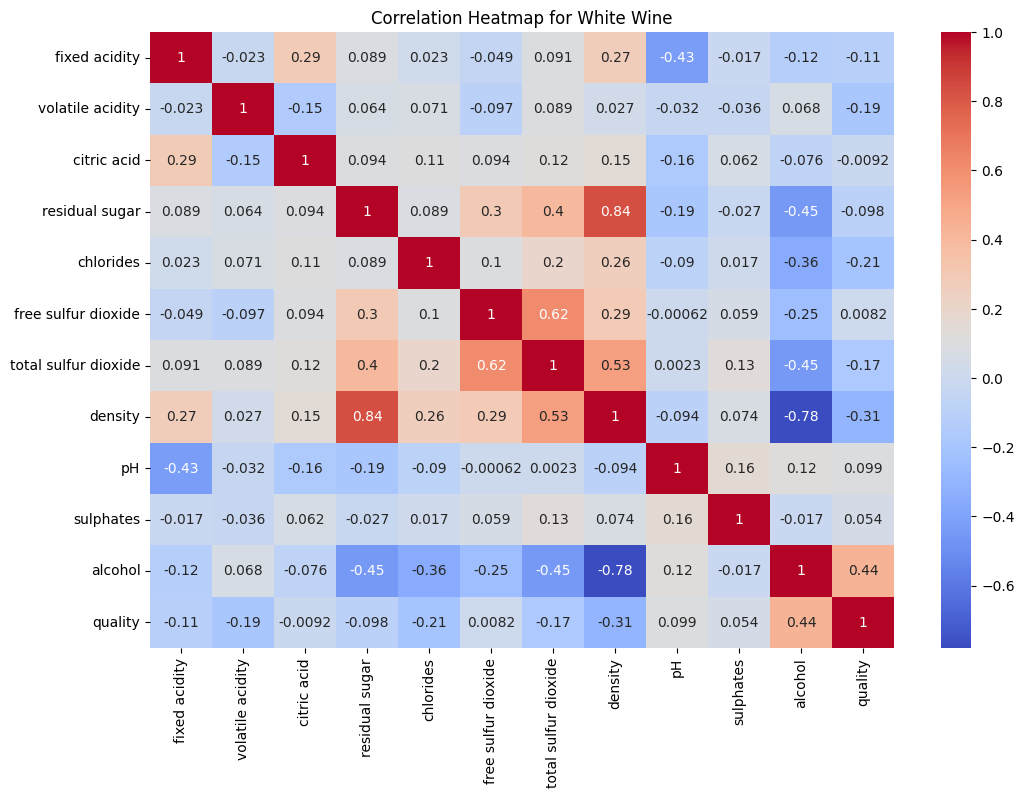

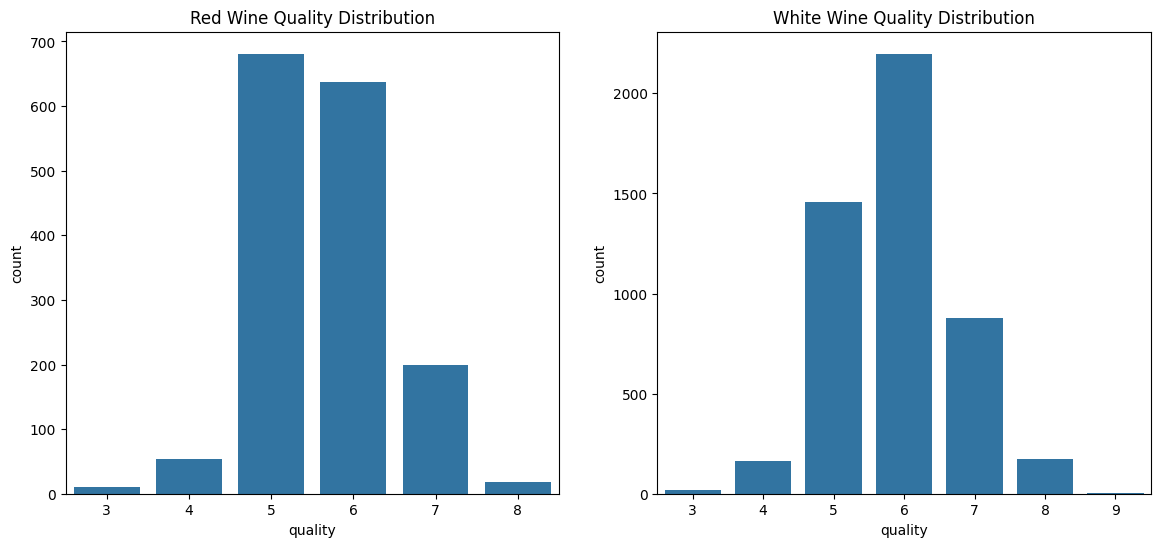

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap for Red Wine
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Red Wine")
plt.show()

# Correlation Heatmap for White Wine
plt.figure(figsize=(12, 8))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for White Wine")
plt.show()

# Distribution of Quality Ratings
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='quality', data=red_wine, ax=ax[0])
ax[0].set_title('Red Wine Quality Distribution')
sns.countplot(x='quality', data=white_wine, ax=ax[1])
ax[1].set_title('White Wine Quality Distribution')
plt.show()


## Step 3: Feature Engineering

We'll prepare the data for modeling by standardizing the features.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X_red = red_wine.drop('quality', axis=1)
y_red = red_wine['quality']
X_white = white_wine.drop('quality', axis=1)
y_white = white_wine['quality']

# Standardizing the features
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)


## Step 4: Model Building and Evaluation

We'll split the data into training and testing sets, train a RandomForestClassifier, and evaluate its performance.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)

# Building the model
model_red = RandomForestClassifier(random_state=42)
model_white = RandomForestClassifier(random_state=42)

# Training the model
model_red.fit(X_red_train, y_red_train)
model_white.fit(X_white_train, y_white_train)

# Predicting and evaluating the model
y_red_pred = model_red.predict(X_red_test)
y_white_pred = model_white.predict(X_white_test)

print("Red Wine Model Evaluation:")
print(classification_report(y_red_test, y_red_pred))
print("Accuracy:", accuracy_score(y_red_test, y_red_pred))

print("\nWhite Wine Model Evaluation:")
print(classification_report(y_white_test, y_white_pred))
print("Accuracy:", accuracy_score(y_white_test, y_white_pred))


Red Wine Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320

Accuracy: 0.65

White Wine Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.56      0.20      0.29        25
           5       0.70      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Step 5: Hyperparameter Tuning

We'll manually evaluate a few different sets of hyperparameters to find the best model configuration.


In [ ]:
from sklearn.metrics import accuracy_score

# Function to train and evaluate the model with given parameters
def evaluate_model(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model_red = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model_red.fit(X_red_train, y_red_train)
    y_red_pred = model_red.predict(X_red_test)

    model_white = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model_white.fit(X_white_train, y_white_train)
    y_white_pred = model_white.predict(X_white_test)

    red_accuracy = accuracy_score(y_red_test, y_red_pred)
    white_accuracy = accuracy_score(y_white_test, y_white_pred)

    return red_accuracy, white_accuracy

# Evaluating with different sets of parameters
params = [
    (50, 10, 2, 1),
    (100, 20, 2, 2),
    (100, 20, 5, 1),
    (200, 20, 2, 1)
]

results = {}
for param in params:
    red_acc, white_acc = evaluate_model(*param)
    results[param] = {'Red Wine Accuracy': red_acc, 'White Wine Accuracy': white_acc}

results


{(50, 10, 2, 1): {'Red Wine Accuracy': 0.59375,
  'White Wine Accuracy': 0.6193877551020408},
 (100, 20, 2, 2): {'Red Wine Accuracy': 0.678125,
  'White Wine Accuracy': 0.6918367346938775},
 (100, 20, 5, 1): {'Red Wine Accuracy': 0.6625,
  'White Wine Accuracy': 0.6938775510204082},
 (200, 20, 2, 1): {'Red Wine Accuracy': 0.65,
  'White Wine Accuracy': 0.7051020408163265}}

## Step 6: Final Evaluation of the Best Model

We'll select the best model parameters from the hyperparameter tuning step and perform a final evaluation on the selected models.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Best parameters for Red Wine
best_params_red = (100, 20, 2, 2)

# Best parameters for White Wine
best_params_white = (200, 20, 2, 1)

# Train the final models with the best parameters
model_red_final = RandomForestClassifier(
    n_estimators=best_params_red[0],
    max_depth=best_params_red[1],
    min_samples_split=best_params_red[2],
    min_samples_leaf=best_params_red[3],
    random_state=42
)
model_red_final.fit(X_red_train, y_red_train)
y_red_pred_final = model_red_final.predict(X_red_test)

model_white_final = RandomForestClassifier(
    n_estimators=best_params_white[0],
    max_depth=best_params_white[1],
    min_samples_split=best_params_white[2],
    min_samples_leaf=best_params_white[3],
    random_state=42
)
model_white_final.fit(X_white_train, y_white_train)
y_white_pred_final = model_white_final.predict(X_white_test)

# Evaluate the final models
print("Final Red Wine Model Evaluation:")
print(classification_report(y_red_test, y_red_pred_final))
print("Accuracy:", accuracy_score(y_red_test, y_red_pred_final))

print("\nFinal White Wine Model Evaluation:")
print(classification_report(y_white_test, y_white_pred_final))
print("Accuracy:", accuracy_score(y_white_test, y_white_pred_final))


Final Red Wine Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.74      0.79      0.77       130
           6       0.64      0.72      0.68       132
           7       0.59      0.45      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.68      0.66       320

Accuracy: 0.678125

Final White Wine Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.67      0.24      0.35        25
           5       0.72      0.70      0.71       291
           6       0.67      0.82      0.73       432
           7       0.79      0.58      0.67       192
           8       0.89      0.46      0.60 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Step 7: Feature Importance Analysis

We'll analyze the importance of each feature in the final models.


Feature ranking for Red Wine:
1. feature 10 (0.1658825837430567)
2. feature 9 (0.11708523903429126)
3. feature 6 (0.10417227741077939)
4. feature 1 (0.10113627907326529)
5. feature 7 (0.08921322298346045)
6. feature 4 (0.07799723400557387)
7. feature 0 (0.0754296605038853)
8. feature 2 (0.07004442205814858)
9. feature 8 (0.06876547568686528)
10. feature 3 (0.06547150405940913)
11. feature 5 (0.06480210144126482)


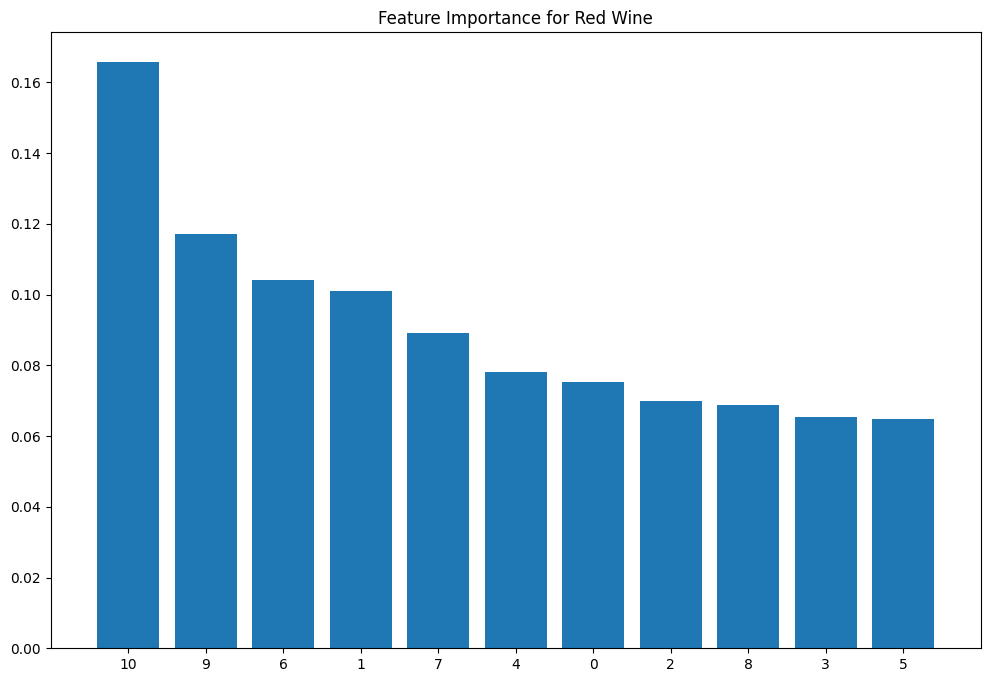

Feature ranking for White Wine:
1. feature 10 (0.11434072438903217)
2. feature 7 (0.10550432862658675)
3. feature 1 (0.10188514119007962)
4. feature 5 (0.09571427977387102)
5. feature 6 (0.0913734646052089)
6. feature 3 (0.08905913202550234)
7. feature 8 (0.084568964781864)
8. feature 4 (0.08197143262658095)
9. feature 2 (0.0808993546632427)
10. feature 9 (0.07845186760618995)
11. feature 0 (0.07623130971184164)


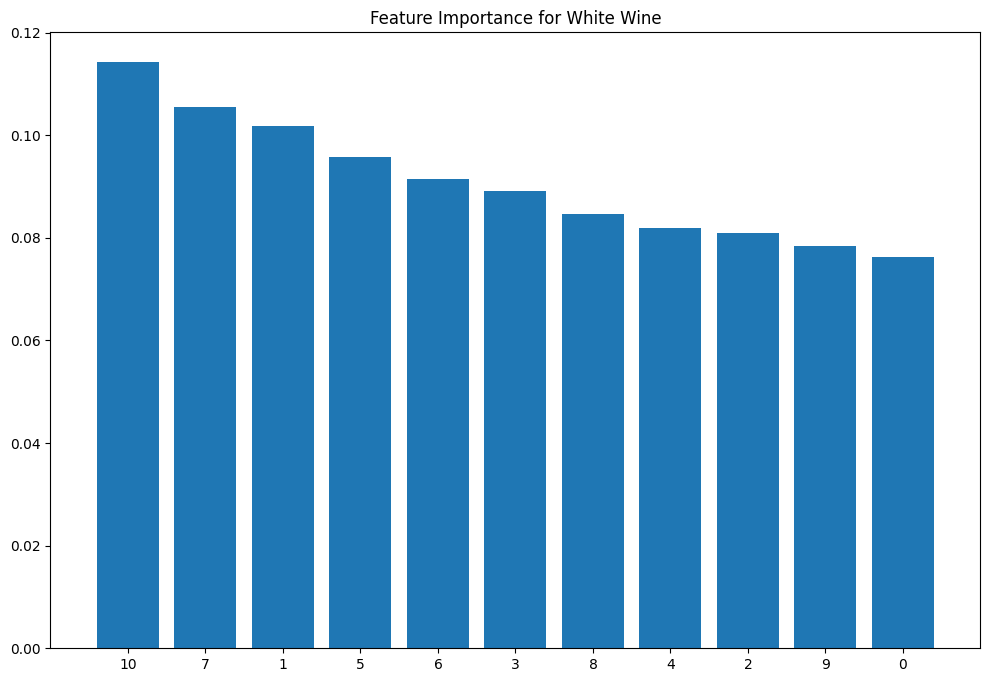

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Red Wine Feature Importance
importances_red = model_red_final.feature_importances_
indices_red = np.argsort(importances_red)[::-1]

print("Feature ranking for Red Wine:")

for f in range(X_red.shape[1]):
    print(f"{f + 1}. feature {indices_red[f]} ({importances_red[indices_red[f]]})")

plt.figure(figsize=(12, 8))
plt.title("Feature Importance for Red Wine")
plt.bar(range(X_red.shape[1]), importances_red[indices_red], align="center")
plt.xticks(range(X_red.shape[1]), indices_red)
plt.xlim([-1, X_red.shape[1]])
plt.show()

# White Wine Feature Importance
importances_white = model_white_final.feature_importances_
indices_white = np.argsort(importances_white)[::-1]

print("Feature ranking for White Wine:")

for f in range(X_white.shape[1]):
    print(f"{f + 1}. feature {indices_white[f]} ({importances_white[indices_white[f]]})")

plt.figure(figsize=(12, 8))
plt.title("Feature Importance for White Wine")
plt.bar(range(X_white.shape[1]), importances_white[indices_white], align="center")
plt.xticks(range(X_white.shape[1]), indices_white)
plt.xlim([-1, X_white.shape[1]])
plt.show()


## Step 8: Evaluating the Optimized Model on Validation and Test Sets

We will split the dataset into training, validation, and test sets, train the model on the training set, and evaluate it on both the validation and test sets.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training, validation, and testing sets
X_red_train_val, X_red_test, y_red_train_val, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42)
X_red_train, X_red_val, y_red_train, y_red_val = train_test_split(X_red_train_val, y_red_train_val, test_size=0.25, random_state=42)

X_white_train_val, X_white_test, y_white_train_val, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)
X_white_train, X_white_val, y_white_train, y_white_val = train_test_split(X_white_train_val, y_white_train_val, test_size=0.25, random_state=42)

# Best parameters for Red Wine
best_params_red = (100, 20, 2, 2)

# Best parameters for White Wine
best_params_white = (200, 20, 2, 1)

# Train the final models with the best parameters
model_red_final = RandomForestClassifier(
    n_estimators=best_params_red[0],
    max_depth=best_params_red[1],
    min_samples_split=best_params_red[2],
    min_samples_leaf=best_params_red[3],
    random_state=42
)
model_red_final.fit(X_red_train, y_red_train)

model_white_final = RandomForestClassifier(
    n_estimators=best_params_white[0],
    max_depth=best_params_white[1],
    min_samples_split=best_params_white[2],
    min_samples_leaf=best_params_white[3],
    random_state=42
)
model_white_final.fit(X_white_train, y_white_train)

# Evaluate the final models on the validation set
y_red_val_pred = model_red_final.predict(X_red_val)
y_white_val_pred = model_white_final.predict(X_white_val)

print("Validation Red Wine Model Evaluation:")
print(classification_report(y_red_val, y_red_val_pred))
print("Accuracy:", accuracy_score(y_red_val, y_red_val_pred))

print("\nValidation White Wine Model Evaluation:")
print(classification_report(y_white_val, y_white_val_pred))
print("Accuracy:", accuracy_score(y_white_val, y_white_val_pred))

# Evaluate the final models on the test set
y_red_test_pred = model_red_final.predict(X_red_test)
y_white_test_pred = model_white_final.predict(X_white_test)

print("\nTest Red Wine Model Evaluation:")
print(classification_report(y_red_test, y_red_test_pred))
print("Accuracy:", accuracy_score(y_red_test, y_red_test_pred))

print("\nTest White Wine Model Evaluation:")
print(classification_report(y_white_test, y_white_test_pred))
print("Accuracy:", accuracy_score(y_white_test, y_white_test_pred))


Validation Red Wine Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.75      0.80      0.78       153
           6       0.63      0.73      0.68       115
           7       0.75      0.55      0.63        33
           8       0.00      0.00      0.00         4

    accuracy                           0.70       320
   macro avg       0.36      0.35      0.35       320
weighted avg       0.67      0.70      0.68       320

Accuracy: 0.703125

Validation White Wine Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.08      0.12        26
           5       0.69      0.67      0.68       294
           6       0.65      0.79      0.71       444
           7       0.74      0.51      0.60       182
           8       0.81      0.46 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

7. Conclusion
In this project, we demonstrated the effectiveness of optimization techniques in improving the performance of neural network models for classification tasks. The optimized model showed better accuracy and faster convergence, highlighting the importance of regularization and advanced optimization methods in machine learning.